# Statistics and charts

1. [Rationale](#rationale)
2. [Load dataset and libraries](#load-reqs)
3. [Total number of quotes of people in STEM](#quotes-total)
4. [Evolution of the number of articles quoting STEM people from 2016 to 2020](#quoting-articles-evolution)
5. [Evolution of gender bias in quoted people in STEM from 2016 to 2020](#quoting-gender-evolution)
6. [Distribution of quotes per newspaper ](#quotes-gender-newspaper)

## 1. Rationale <a class="anchor" id="rationale"></a>

I analyze here if the number of men and women appearing in the Spanish newspapers are different. To do so, I will use Chi-square Goodness of Fit test, when 2 proportions are compared (i.e. number of men vs number of women in any given year) and Chi-square Independence test when several proportions are compared (i.e. number of men and women in several newspapers).

Always, number of people and mentions (i.e. quotes) refer to people names whose gender could be assigned. NER-collected names whose gender could not be assigned is generally due to the name not having a first name, which normally is due to a failure of the NER collection process (i.e. it is a institution, or a position, or family names only; in all these cases, the name is not considered for computing women/men mentions).

## 2. Load dataset and libraries <a class="anchor" id="load-reqs"></a>

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare
from scipy.stats import chi2
import itertools

In [67]:
articles = pd.read_csv('data/sample50k_articles_stats.csv', sep='‰', engine='python', index_col=0)
people = pd.read_csv('data/sample50k_people_stats.csv', sep='‰', engine='python', index_col=0)

## 3. Total number of quotes of people in STEM <a class="anchor" id="quotes-total"></a>

### Mentions (same or different person)

In the entire period studied, men are mentioned 2134 times, while women are mentioned only 716 times:

In [68]:
people['gender'].value_counts()

male       2140
female      703
unknown     458
andy         61
Name: gender, dtype: int64

In [69]:
articles['mentions_STEM_women'].sum()

703

In [70]:
articles['mentions_STEM_men'].sum()

2140

In [71]:
2134+716

2850

The difference is statistically significant:

In [72]:
# chi-square test:
mentions_women = articles['mentions_STEM_women'].sum()
mentions_men = articles['mentions_STEM_men'].sum()
chisq, p = chisquare([mentions_women, mentions_men])
print(f'p = {p:4.5f}')

p = 0.00000


In [73]:
print("% of mentions of women in STEM = {}".format(round(100 * mentions_women / (mentions_women + mentions_men), 1)))

% of mentions of women in STEM = 24.7


### Unique people

1965 different men are mentioned, while only 672 different women are:

In [74]:
people.groupby('gender').nunique()

,full_name
gender,
andy,61
female,673
male,1974
unknown,451


Unique people (with assignable gender) identified

In [75]:
1965+672

2637

Considering women and men, the difference is again statistically significant:

In [76]:
# chi-square test:
chisq, p = chisquare([672, 1965])
print(f'p = {p:4.5f}')

p = 0.00000


In [77]:
print("% of women in STEM in Spanish press = {}".format(round(100 * 672 / (672 + 1965), 1)))

% of women in STEM in Spanish press = 25.5


### % articles quoting STEM people

Number of articles that mention at least 1 STEM person:

In [78]:
articles_stem = articles.loc[(articles['mentions_STEM_men'] > 0) | (articles['mentions_STEM_women'] >0)]
articles_stem.shape

(1845, 4)

In [79]:
print("% articles with 1 or more STEM mentions = {}% (n={})".format(\
                round(100 * articles_stem.shape[0]/articles.shape[0], 1), articles_stem.shape[0]))

% articles with 1 or more STEM mentions = 7.1% (n=1845)


In [80]:
mentions_women = articles.loc[articles['mentions_STEM_women'] > 0]
print("% articles mentioning women in STEM = {}%".format(round(100 * mentions_women.shape[0]/articles.shape[0], 1)))

% articles mentioning women in STEM = 2.3%


In [81]:
mentions_men = articles.loc[articles['mentions_STEM_men'] > 0]
print("% articles mentioning men in STEM = {}%".format(round(100 * mentions_men.shape[0]/articles.shape[0], 1)))

% articles mentioning men in STEM = 5.7%


% women mentions from the total of mentions:

In [82]:
mentions_men_stem = articles_stem['mentions_STEM_men'].sum()
mentions_women_stem = articles_stem['mentions_STEM_women'].sum()
pcg_mentions_men = 100 * mentions_men_stem / (mentions_men_stem + mentions_women_stem)
pcg_mentions_women = 100 * mentions_women_stem / (mentions_men_stem + mentions_women_stem)
print("From the total of articles mentioning at least 1 STEM person,\nthe % of women mentions is = {}% \
and the % of men mentions is = {}%".format(round(pcg_mentions_women,1), round(pcg_mentions_men,1)))

From the total of articles mentioning at least 1 STEM person,
the % of women mentions is = 24.7% and the % of men mentions is = 75.3%


### Gender difference in the distribution of article frequency by number of quotes/article

In [83]:
#men_color = '#fd625e'
#men_color = '#808080'
#men_color = '#393939'
men_color = '#555'
men_color_light = '#c6c6c6'
#women_color = '#01b8aa'
#women_color = '#90EE90'
#women_color = '#4B0082'
#women_color = '#8300e4'
women_color = '#7a00d4'
women_color_light = '#d7a1ff'
common_color='#200039'

In [84]:
def distribution_article_mentions_gender(men_data, women_data):
    ''' Plots a bidirectional horizontal histogram of the number of articles vs the number of mentions in the article
    
    INPUT:
        men_data (pandas series): 'mentions_STEM_men' column of articles dataframe, filtered for those with at least 
        1 mention of men
        women_data (pandas series): 'mentions_STEM_women' column of articles dataframe, filtered for those with at 
        least 1 mention of men
    '''
    # get counts and labels
    labels_male, counts_male = np.unique(men_data, return_counts=True)
    labels_female, counts_female = np.unique(women_data, return_counts=True)
    labels_male = list(labels_male)
    labels_female = list(labels_female)
    # build charts
    fig, axes = plt.subplots(figsize=(7,3), ncols=2, sharey=True)
    bar_male = axes[0].barh(labels_male, counts_male, align='center', color=men_color, zorder=10)
    axes[0].set_title('Men', fontsize=12, pad=5, color=men_color)
    bar_female = axes[1].barh(labels_female, counts_female, align='center', color=women_color, zorder=10)
    axes[1].set_title('Women', fontsize=12, pad=5, color=women_color)
    # invert axis (mirrow x, y from highest to lowest value)
    axes[0].invert_xaxis() 
    plt.gca().invert_yaxis()
    # y axis label
    axes[0].set(ylabel='# MEN quoted \nin the same article')
    axes[0].yaxis.label.set_color(men_color)
    axes[0].yaxis.label.set_fontsize(9)
    axes[1].set(ylabel='# WOMEN quoted \nin the same article')
    axes[1].yaxis.label.set_color(women_color)
    axes[1].yaxis.set_label_position('right')
    axes[1].yaxis.label.set_fontsize(9)
    # y axis tick format
    all_labels = list(set(labels_male + labels_female))
    plt.gca().set_yticks(all_labels)
    axes[0].yaxis.tick_right()
    axes[0].set_yticklabels(all_labels, ha='center', color=common_color)
    axes[0].tick_params(axis='y', pad=11, size=15, color=men_color_light)
    axes[1].tick_params(axis='y', size=15, color=women_color_light)
    # set tick values in x axis
    axes[0].set_xticks([200, 1200])
    axes[1].set_xticks([200, 1200])
    # remove square surrounding chart and keep only used axes
    axes[0].spines['left'].set_visible(False)
    axes[0].spines['top'].set_visible(False)
    axes[1].spines['right'].set_visible(False)
    axes[1].spines['top'].set_visible(False)
    # change axes colors
    axes[0].spines['bottom'].set_color(men_color_light)
    axes[0].spines['right'].set_color(men_color_light)
    axes[1].spines['bottom'].set_color(women_color_light)
    axes[1].spines['left'].set_color(women_color_light)
    axes[0].tick_params(axis='x', colors=men_color_light)
    axes[1].tick_params(axis='x', colors=women_color_light)
    axes[0].xaxis.label.set_color(men_color)
    axes[1].xaxis.label.set_color(women_color)
    # show bar value
    axes[0].bar_label(bar_male, padding=2, color=men_color, size=8)
    axes[1].bar_label(bar_female, padding=2, color=women_color, size=8)
    # Plot title
    fig.supxlabel('# articles', y=-0.05, color=common_color)
    # Annotation below x axis label
    plt.figtext(0.30, -0.12, '5200 articles sampled each year from 2016 to 2020', size=8, color=common_color)
    plt.figtext(0.29, -0.16, '1300 articles from each of the 4 newspapers analyzed', size=8, color=common_color)
    plt.figtext(0.21, -0.20, 'Only articles mentioning at least 1 STEM person are considered (n=1850)', size=8, color=common_color)
    # Subplot arrangement
    plt.subplots_adjust(wspace=0.3, top=0.80)
    # Chart title
    fig.suptitle('Distribution of article quotes from STEM people by Gender', fontsize=14, color=common_color)
    plt.savefig('img/distribution_article_mentions_genre.png', bbox_inches="tight", dpi=200)
    plt.show()

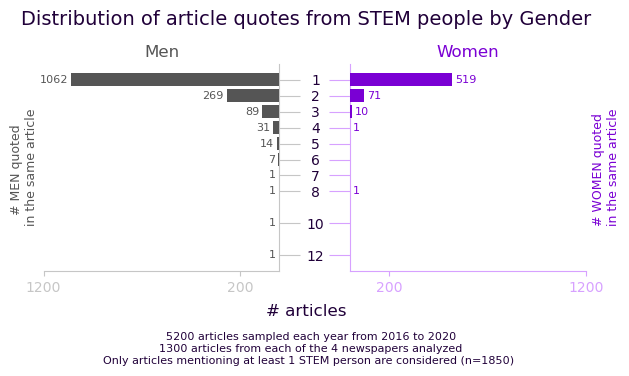

In [85]:
distribution_article_mentions_gender(articles.loc[articles['mentions_STEM_men']>0]['mentions_STEM_men'], \
                               articles.loc[articles['mentions_STEM_women']>0]['mentions_STEM_women'])

### Distribution of most quoted people in STEM by gender

Most people receive 1 mention. There are 124 people that are mentioned in 2 articles, 22 people that are mentioned in 3 articles, 5 people that are mentioned in 4-5 articles and 1 person who is mentioned in 11.

In [86]:
people_with_gender = people.loc[people['gender'].isin(['male','female'])].reset_index().groupby(['full_name','gender'])[['article_id']].count()
people_with_gender.value_counts()

article_id
1             2495
2              124
3               22
4                3
5                2
12               1
dtype: int64

Let's explore the most mentioned people

In [87]:
popular_people = people_with_gender.loc[people_with_gender['article_id']>1]
popular_people.sort_values('article_id', ascending=False)

,,article_id
full_name,gender,
Gay de Liébana,male,12
Mies van der Rohe,male,5
Mark Zuckerberg,male,5
José María Martínez,male,4
José María Madiedo,male,4
...,...,...
Ferran Brunet,male,2
Fernando Vallespín,male,2
Fernando Trujillo,male,2


In [88]:
popular_people.reset_index().groupby(['gender','article_id']).count()

full_name
gender article_id           
female 2                  26
       3                   2
male   2                  98
       3                  20
       4                   3
       5                   2
       12                  1

In [89]:
def distribution_people_mentions_gender(men_data, women_data):
    ''' Plots a bidirectional horizontal histogram of the number of articles vs the number of mentions in the article
    
    INPUT:
        men_data (pandas series): index = number of articles mentioning 1 STEM person (male)
        values = number of people whose number of mentions (articles) is the index value
        (i.e. 150 men has 2 mentions, 20 men has 3 mentions, 5 men has 7 mentions) 
        
        women_data (pandas series): as with men data but with women data
    '''
    # get counts and labels
    labels_male = men_data.index
    counts_male = men_data.values
    labels_female = women_data.index
    counts_female = women_data.values
    labels_male = list(labels_male)
    labels_female = list(labels_female)
    # build charts
    fig, axes = plt.subplots(figsize=(7,3), ncols=2, sharey=True)
    bar_male = axes[0].barh(labels_male, counts_male, align='center', color=men_color, zorder=10)
    axes[0].set_title('Men', fontsize=12, pad=5, color=men_color)
    bar_female = axes[1].barh(labels_female, counts_female, align='center', color=women_color, zorder=10)
    axes[1].set_title('Women', fontsize=12, pad=5, color=women_color)
    # invert axis (mirrow x, y from highest to lowest value)
    axes[0].invert_xaxis() 
    plt.gca().invert_yaxis()
    # y axis label
    axes[0].set(ylabel='# articles quoting \nthe same MAN')
    axes[0].yaxis.label.set_color(men_color)
    axes[0].yaxis.label.set_fontsize(9)
    axes[1].set(ylabel='# articles quoting \nthe same WOMAN')
    axes[1].yaxis.label.set_color(women_color)
    axes[1].yaxis.set_label_position('right')
    axes[1].yaxis.label.set_fontsize(9)
    # y axis tick format
    all_labels = list(set(labels_male + labels_female))
    plt.gca().set_yticks(all_labels)
    axes[0].yaxis.tick_right()
    axes[0].set_yticklabels(all_labels, ha='center', color=common_color)
    axes[0].tick_params(axis='y', pad=11, size=15, color=men_color_light)
    axes[1].tick_params(axis='y', size=15, color=women_color_light)
    # set tick values in x axis
    axes[0].set_xticks([10, 100])
    axes[1].set_xticks([10, 100])
    # remove square surrounding chart and keep only used axes
    axes[0].spines['left'].set_visible(False)
    axes[0].spines['top'].set_visible(False)
    axes[1].spines['right'].set_visible(False)
    axes[1].spines['top'].set_visible(False)
    # change axes colors
    axes[0].spines['bottom'].set_color(men_color_light)
    axes[0].spines['right'].set_color(men_color_light)
    axes[1].spines['bottom'].set_color(women_color_light)
    axes[1].spines['left'].set_color(women_color_light)
    axes[0].tick_params(axis='x', colors=men_color_light)
    axes[1].tick_params(axis='x', colors=women_color_light)
    axes[0].xaxis.label.set_color(men_color)
    axes[1].xaxis.label.set_color(women_color)
    # show bar value
    axes[0].bar_label(bar_male, padding=2, color=men_color, size=8)
    axes[1].bar_label(bar_female, padding=2, color=women_color, size=8)
    # Plot title
    fig.supxlabel('# STEM people', y=-0.05, color=common_color)
    # Annotation below x axis label
    plt.figtext(0.30, -0.12, '5200 articles sampled each year from 2016 to 2020', size=8, color=common_color)
    plt.figtext(0.29, -0.16, '1300 articles from each of the 4 newspapers analyzed', size=8, color=common_color)
    plt.figtext(0.25, -0.20, 'Only people being quoted at least twice are considered (n=151)', size=8, color=common_color)
    # Subplot arrangement
    plt.subplots_adjust(wspace=0.3, top=0.80)
    # Chart title
    fig.suptitle('Distribution of top popularity among STEM people by Gender', fontsize=14, color=common_color)
    plt.savefig('img/distribution_people_mentions_genre.png', bbox_inches="tight", dpi=200)
    plt.show()

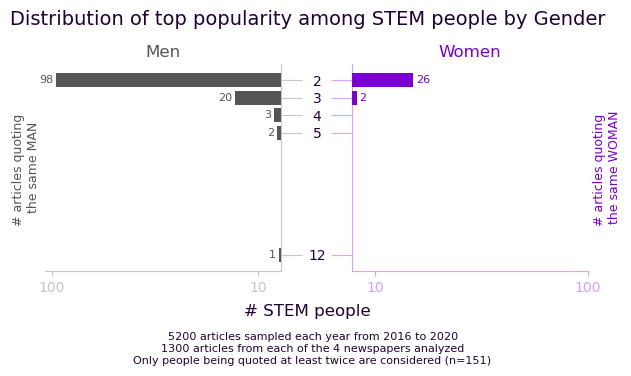

In [90]:
vals_popular_people = popular_people.reset_index().groupby(['gender','article_id']).count()['full_name']
distribution_people_mentions_gender(vals_popular_people['male',:], vals_popular_people['female',:])

## 4. Evolution of the number of articles quoting STEM people from 2016 to 2020 <a class="anchor" id="quoting-articles-evolution"></a>

Total number of articles analyzed each year:

In [91]:
articles['frontpage_date'] = pd.to_datetime(articles['frontpage_date'], format= '%Y-%m-%d')
articles['year'] = articles['frontpage_date'].dt.year

In [92]:
articles.reset_index().groupby('year')['article_id'].count()

year
2016    5200
2017    5200
2018    5200
2019    5200
2020    5200
Name: article_id, dtype: int64

Number of articles mentioning STEM people:

In [93]:
articles.reset_index().loc[(articles.reset_index()['mentions_STEM_men'] > 0) | (articles.reset_index()['mentions_STEM_women'] >0)].groupby('year')['article_id'].count()

year
2016    346
2017    330
2018    371
2019    383
2020    415
Name: article_id, dtype: int64

There is also a statistically significant difference across years (p=0.02). However, pairwise comparisons, applying bonferroni correction, reveals that the only different year is 2020 when compared with 2017. All the rest comparisons are not statistically different. This suggests that in 2020 the number of STEM mentions has increased, which probably is due to the appearance of the pandemic. Because of this, an increase in 2020 in mentions of women or men cannot be considered to be due to a heightened awareness, unless this baseline increase is considered.

In [94]:
# chi-square test:
chisq, p = chisquare([348, 331, 373, 383, 415])
print(f'p = {p:4.5f}')

p = 0.02268


In [95]:
def pairwise_years_comparisons(data_dictionary):
    ''' Performs chi square for all pair-wise combinations in input dictionary and prints
    if statistically significant (applying bonferroni correction)
    
    INPUT:
        data_dictionary (dict): contains years as keys and counts as values
    '''
    are_there_diffs = False
    pair_wise = list(itertools.combinations(data_dictionary,2))
    bonferroni_corrected_alpha = 0.05 / len(pair_wise)
    for year1,year2 in pair_wise:
        chisq, p = chisquare([data_dictionary[year1],data_dictionary[year2]])
        if p < bonferroni_corrected_alpha:
            print("{} and {} are statistically different, p = {:4.5f}".format(year1, year2, p))
            are_there_diffs = True
    if are_there_diffs == False:
        print("There are no pairwise differences")
    print("Bonferroni corrected alpha = {}".format(bonferroni_corrected_alpha))   

In [96]:
articles_per_year = {2016:348,2017:331,2018:373,2019:383,2020:415}
pairwise_years_comparisons(articles_per_year)

2017 and 2020 are statistically different, p = 0.00210
Bonferroni corrected alpha = 0.005


## 5. Evolution of gender bias in quoted people in STEM from 2016 to 2020 <a class="anchor" id="quoting-gender-evolution"></a>

In [97]:
articles['frontpage_date'] = pd.to_datetime(articles['frontpage_date'], format='%Y-%m-%d')
articles['year'] = articles['frontpage_date'].dt.year

In [98]:
people_years = people.merge(articles[['year']], left_index=True, right_index=True)
people_years.reset_index(inplace=True)

### Gender difference in the number of quotes

In [99]:
people_years.loc[people_years['gender'].isin(['female', 'male'])].groupby(['year', 'gender'])['article_id'].count()

year  gender
2016  female    124
      male      368
2017  female    119
      male      374
2018  female    132
      male      471
2019  female    160
      male      454
2020  female    168
      male      473
Name: article_id, dtype: int64

#### Is the distribution of mentions of men and women different across years?

In [100]:
mentions_men_years = dict(people_years.loc[people_years['gender']=='male'].groupby('year')['article_id'].count())
mentions_women_years = dict(people_years.loc[people_years['gender']=='female'].groupby('year')['article_id'].count())

In [101]:
def gender_yearly_comparison(men_dict, women_dict, variable_of_interest):
    ''' Compares men and women for all years
    
    INPUT:
        men_dict (dictionary): years as keys
        women_dict (dictionary)_ years as keys
        variable_of_interest (string): name of variable to compare between women and men
    '''
    are_there_diffs = False
    bonferroni_corrected_alpha = 0.05 / len(women_dict)
    for year in range (min(women_dict), max(women_dict) + 1):
        chisq, p = chisquare([men_dict[year], women_dict[year]])
        if p < bonferroni_corrected_alpha:
            print("{} are different in year {}, p = {:4.5f}".format(variable_of_interest, year, p))
            are_there_diffs = True
    if are_there_diffs == False:
        print("There are no differences between women and men in any year")
    print("Bonferroni corrected alpha = {}".format(bonferroni_corrected_alpha))        

In [102]:
gender_yearly_comparison(mentions_men_years, mentions_women_years, 'Mentions of men and women')

Mentions of men and women are different in year 2016, p = 0.00000
Mentions of men and women are different in year 2017, p = 0.00000
Mentions of men and women are different in year 2018, p = 0.00000
Mentions of men and women are different in year 2019, p = 0.00000
Mentions of men and women are different in year 2020, p = 0.00000
Bonferroni corrected alpha = 0.01


#### Do mentions of men change across years?

There is a significant difference across years:

In [103]:
mentions_men = [mentions_men_years[key] for key in mentions_men_years]
# chi-square test:
chisq, p = chisquare(mentions_men)
print(f'p = {p:4.5f}')

p = 0.00003


Pairwise combinations show that 2016 and 2017 are different from 2018, 2019 and 2020:

In [104]:
pairwise_years_comparisons(mentions_men_years)

2016 and 2018 are statistically different, p = 0.00038
2016 and 2019 are statistically different, p = 0.00270
2016 and 2020 are statistically different, p = 0.00029
2017 and 2018 are statistically different, p = 0.00085
2017 and 2020 are statistically different, p = 0.00067
Bonferroni corrected alpha = 0.005


#### Do mentions of women change across years?

In [105]:
mentions_women = [mentions_women_years[key] for key in mentions_women_years]
# chi-square test:
chisq, p = chisquare(mentions_women)
print(f'p = {p:4.5f}')

p = 0.00789


There is evidence that not all years are equal (above). However, when doing pair-wise comparisons, there is a significant difference only between years 2020 and 2017. This is in stark contrast with men, where there is highly significant increase in the latter years compared to all the earlier years.

In [106]:
pairwise_years_comparisons(mentions_women_years)

2017 and 2020 are statistically different, p = 0.00382
Bonferroni corrected alpha = 0.005


### Unique men and women quoted throughout years

In [107]:
round(1.25,1)+0.1

1.3

In [108]:
def unique_people_years(counts_male, counts_female):
    ''' Plot a mirror horizontal bar from 2016 to 2020
    
    INPUT:
        counts_male (numpy array): 
        counts_female (numpy array): 
    '''

    labels = [2016, 2017, 2018, 2019, 2020]
    # build charts
    fig, axes = plt.subplots(figsize=(7,1.75), ncols=2, sharey=True)
    bar_male = axes[0].barh(labels, counts_male, align='center', color=men_color, zorder=10)
    axes[0].set_title('Men', fontsize=12, pad=5, color=men_color)
    bar_female = axes[1].barh(labels, counts_female, align='center', color=women_color, zorder=10)
    axes[1].set_title('Women', fontsize=12, pad=5, color=women_color)
    # invert axis (mirrow x, y from highest to lowest value)
    axes[0].invert_xaxis() 
    plt.gca().invert_yaxis()
    # y axis tick format
    plt.gca().set_yticks(labels)
    axes[0].yaxis.tick_right()
    axes[0].set_yticklabels(labels, ha='center', color=common_color)
    axes[0].tick_params(axis='y', pad=18, size=15, color=men_color_light)
    axes[1].tick_params(axis='y', size=15, color=women_color_light)
    # set tick values in x axis
    max_val = max(np.maximum(counts_male, counts_female))
    max_xtick = ((max_val // 100) + 1) * 100
    min_xtick = max_xtick / 10
    axes[0].set_xticks([min_xtick, max_xtick])
    axes[1].set_xticks([min_xtick, max_xtick])
    # remove square surrounding chart and keep only used axes
    axes[0].spines['left'].set_visible(False)
    axes[0].spines['top'].set_visible(False)
    axes[1].spines['right'].set_visible(False)
    axes[1].spines['top'].set_visible(False)
    # change axes colors
    axes[0].spines['bottom'].set_color(men_color_light)
    axes[0].spines['right'].set_color(men_color_light)
    axes[1].spines['bottom'].set_color(women_color_light)
    axes[1].spines['left'].set_color(women_color_light)
    axes[0].tick_params(axis='x', colors=men_color_light)
    axes[1].tick_params(axis='x', colors=women_color_light)
    axes[0].xaxis.label.set_color(men_color)
    axes[1].xaxis.label.set_color(women_color)
    # show bar value
    axes[0].bar_label(bar_male, padding=2, color=men_color, size=8)
    axes[1].bar_label(bar_female, padding=2, color=women_color, size=8)
    plt.subplots_adjust(wspace=0.4, top=0.70)
    # Chart title
    fig.suptitle('# of unique women and men quoted each year', fontsize=14, color=common_color)
    # Subxlabel
    fig.supxlabel('5200 articles sampled each year from 2016 to 2020 \
    \n1300 articles from each of the 4 newspapers analyzed \
    \n ** = p < 0.005', fontsize=8, y=-0.28, color=common_color)
    # Add lines depicting statistically significant differences:
    axes[0].annotate('',xy=(520,2020))
    # save chart and show
    plt.savefig('img/unique_mentions_genre.png', bbox_inches="tight", dpi=200)
    plt.show()   

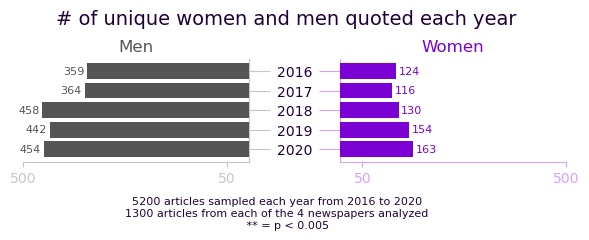

In [109]:
vals_unique_people_years = people_years.loc[people_years['gender'].isin(['female', 'male'])].groupby(['year', 'gender'])['full_name'].nunique()
unique_people_years(vals_unique_people_years[:,'male'], vals_unique_people_years[:,'female'])

In [110]:
unique_men_years = dict(people_years.loc[people_years['gender']=='male'].groupby('year')['full_name'].nunique())
unique_women_years = dict(people_years.loc[people_years['gender']=='female'].groupby('year')['full_name'].nunique())
gender_yearly_comparison(unique_men_years, unique_women_years, 'Unique women and men mentioned')

Unique women and men mentioned are different in year 2016, p = 0.00000
Unique women and men mentioned are different in year 2017, p = 0.00000
Unique women and men mentioned are different in year 2018, p = 0.00000
Unique women and men mentioned are different in year 2019, p = 0.00000
Unique women and men mentioned are different in year 2020, p = 0.00000
Bonferroni corrected alpha = 0.01


#### Does the number of unique men mentioned change across years?

There is a significant difference across years:

In [111]:
unique_men = [unique_men_years[key] for key in unique_men_years]
# chi-square test:
chisq, p = chisquare(unique_men)
print(f'p = {p:4.5f}')

p = 0.00009


Pairwise combinations show that 2016 and 2017 are different from 2018, 2019 and 2020:

In [112]:
pairwise_years_comparisons(unique_men_years)

2016 and 2018 are statistically different, p = 0.00053
2016 and 2019 are statistically different, p = 0.00336
2016 and 2020 are statistically different, p = 0.00086
2017 and 2018 are statistically different, p = 0.00104
2017 and 2020 are statistically different, p = 0.00165
Bonferroni corrected alpha = 0.005


#### Does the number of unique women mentioned change across years?

In [113]:
unique_women = [unique_women_years[key] for key in unique_women_years]
# chi-square test:
chisq, p = chisquare(unique_women)
print(f'p = {p:4.5f}')

p = 0.01879


There is evidence that not all years are equal (above). However, when doing pair-wise comparisons, there is no significant difference in any pair of years. This is in stark contrast with men, where there is highly significant increase in the latter years.

In [114]:
pairwise_years_comparisons(unique_women_years)

2017 and 2020 are statistically different, p = 0.00490
Bonferroni corrected alpha = 0.005


### Average number of men and women quoted per article

In [115]:
mentions_years = articles[['mentions_STEM_men', 'mentions_STEM_women', 'year']].groupby('year').sum()
mentions_years

,mentions_STEM_men,mentions_STEM_women
year,,
2016,368,124
2017,374,119
2018,471,132
2019,454,160
2020,473,168


In [116]:
n_articles_mentioning_years = articles.reset_index().loc[(articles.reset_index()['mentions_STEM_men'] > 0) | (articles.reset_index()['mentions_STEM_women'] >0)].groupby('year')['article_id'].count()
men_per_article = [mentions_years.loc[year]['mentions_STEM_men']/n_articles_mentioning_years[year] for year in range(2016,2021)]
women_per_article = [mentions_years.loc[year]['mentions_STEM_women']/n_articles_mentioning_years[year] for year in range(2016,2021)]
mentions_years['men_per_article'] = men_per_article
mentions_years['women_per_article'] = women_per_article
mentions_years

,mentions_STEM_men,mentions_STEM_women,men_per_article,women_per_article
year,,,,
2016,368,124,1.063584,0.358382
2017,374,119,1.133333,0.360606
2018,471,132,1.269542,0.355795
2019,454,160,1.185379,0.417755
2020,473,168,1.139759,0.404819


In [117]:
mentions_years['men_per_article'].values

array([1.06358382, 1.13333333, 1.26954178, 1.18537859, 1.13975904])

In [118]:
def mentions_per_article(counts_male, counts_female, plot_title, subxlabel):
    ''' Plot a mirror horizontal bar from 2016 to 2020
    
    INPUT:
        counts_male (numpy array): 
        counts_female (numpy array): 
    '''

    labels = [2016, 2017, 2018, 2019, 2020]
    # build charts
    fig, axes = plt.subplots(figsize=(7,1.75), ncols=2, sharey=True)
    bar_male = axes[0].barh(labels, counts_male, align='center', color=men_color, zorder=10)
    axes[0].set_title('Men', fontsize=12, pad=5, color=men_color)
    bar_female = axes[1].barh(labels, counts_female, align='center', color=women_color, zorder=10)
    axes[1].set_title('Women', fontsize=12, pad=5, color=women_color)
    # invert axis (mirrow x, y from highest to lowest value)
    axes[0].invert_xaxis() 
    plt.gca().invert_yaxis()
    # y axis tick format
    plt.gca().set_yticks(labels)
    axes[0].yaxis.tick_right()
    axes[0].set_yticklabels(labels, ha='center', color=common_color)
    axes[0].tick_params(axis='y', pad=18, size=15, color=men_color_light)
    axes[1].tick_params(axis='y', size=15, color=women_color_light)
    # set tick values in x axis
    max_val = max(np.maximum(counts_male, counts_female))
    max_xtick = round(max_val,1) + 0.1
    min_xtick = 0.5
    axes[0].set_xticks([min_xtick, max_xtick])
    axes[1].set_xticks([min_xtick, max_xtick])
    # remove square surrounding chart and keep only used axes
    axes[0].spines['left'].set_visible(False)
    axes[0].spines['top'].set_visible(False)
    axes[1].spines['right'].set_visible(False)
    axes[1].spines['top'].set_visible(False)
    # change axes colors
    axes[0].spines['bottom'].set_color(men_color_light)
    axes[0].spines['right'].set_color(men_color_light)
    axes[1].spines['bottom'].set_color(women_color_light)
    axes[1].spines['left'].set_color(women_color_light)
    axes[0].tick_params(axis='x', colors=men_color_light)
    axes[1].tick_params(axis='x', colors=women_color_light)
    axes[0].xaxis.label.set_color(men_color)
    axes[1].xaxis.label.set_color(women_color)
    # show bar value
    axes[0].bar_label(bar_male, padding=2, color=men_color, size=8, fmt='{:,.2f}')
    axes[1].bar_label(bar_female, padding=2, color=women_color, size=8, fmt='{:,.2f}')
    plt.subplots_adjust(wspace=0.4, top=0.70)
    # Chart title
    fig.suptitle('# STEM people quoted per article each year', fontsize=14, color=common_color)
    # Subxlabel
    fig.supxlabel('5200 articles sampled each year from 2016 to 2020 \
    \n1300 articles from each of the 4 newspapers analyzed \
    \nOnly articles quoting at least 1 STEM person are considered', \
                  fontsize=8, y=-0.25, color=common_color)
    plt.savefig('img/people_per_article_genre.png', bbox_inches="tight", dpi=200)
    plt.show()   

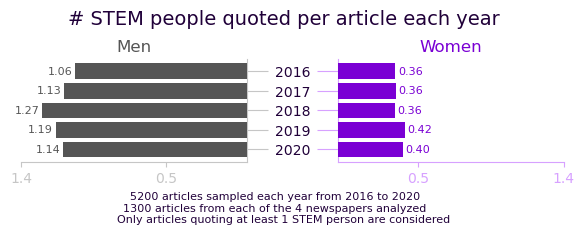

In [119]:
mentions_per_article(mentions_years['men_per_article'].values, mentions_years['women_per_article'].values, \
                 plot_title = '# STEM people mentioned per article', subxlabel = '5200 articles sampled each year from 2016 to 2020\n1300 articles from each of the 4 newspapers analyzed\nOnly articles mentioning at least 1 STEM person are considered')

### % quotes of women and men across years

In [120]:
mentions_years['pcg_men'] = mentions_years['mentions_STEM_men'] / (mentions_years['mentions_STEM_men'] + mentions_years['mentions_STEM_women'])
mentions_years['pcg_women'] = mentions_years['mentions_STEM_women'] / (mentions_years['mentions_STEM_men'] + mentions_years['mentions_STEM_women'])
mentions_years

,mentions_STEM_men,mentions_STEM_women,men_per_article,women_per_article,pcg_men,pcg_women
year,,,,,,
2016,368,124,1.063584,0.358382,0.747967,0.252033
2017,374,119,1.133333,0.360606,0.758621,0.241379
2018,471,132,1.269542,0.355795,0.781095,0.218905
2019,454,160,1.185379,0.417755,0.739414,0.260586
2020,473,168,1.139759,0.404819,0.737910,0.262090


## 6. Distribution of quotes per newspaper <a class="anchor" id="quotes-gender-newspaper"></a>

In [121]:
articles_stem.reset_index().groupby('site')['article_id'].count()

site
abc.es              380
elmundo.es          328
elpais.com          747
lavanguardia.com    390
Name: article_id, dtype: int64

In [122]:
stem_mentions_sources = dict(articles_stem.reset_index().groupby('site')['article_id'].count())
stem_mentions_sources

{'abc.es': 380, 'elmundo.es': 328, 'elpais.com': 747, 'lavanguardia.com': 390}

Let's see if gender bias is more pronounced in any newspaper. To do so, we use a chi-square independence test (see [here](https://rowannicholls.github.io/python/statistics/hypothesis_testing/chi_squared.html)):

In [123]:
mentions_women = articles.loc[articles['mentions_STEM_women'] > 0]
mentions_women_sources_dict = dict(mentions_women.reset_index().groupby('site')['article_id'].count())
mentions_women_sources_dict

{'abc.es': 111, 'elmundo.es': 105, 'elpais.com': 260, 'lavanguardia.com': 126}

In [124]:
mentions_men = articles.loc[articles['mentions_STEM_men'] > 0]
mentions_men_sources_dict = dict(mentions_men.reset_index().groupby('site')['article_id'].count())
mentions_men_sources_dict

{'abc.es': 306, 'elmundo.es': 266, 'elpais.com': 590, 'lavanguardia.com': 314}

In [125]:
mentions_men_sources = [mentions_men_sources_dict[key] for key in mentions_men_sources_dict]
mentions_women_sources = [mentions_women_sources_dict[key] for key in mentions_women_sources_dict]

In [126]:
# Are two distributions independent?
observations = np.array([mentions_men_sources, mentions_women_sources])
row_totals = np.array([np.sum(observations, axis=1)])
col_totals = np.array([np.sum(observations, axis=0)])
n = np.sum(observations)
# Calculate the expected observations
expected = np.dot(row_totals.T, col_totals) / n
# Calculate the chi-square test statistic
chisq, p = chisquare(observations, expected)
chisq = np.sum(chisq)
# Degrees of freedom
rows = observations.shape[0]
cols = observations.shape[1]
df = (rows - 1) * (cols - 1)
# Convert chi-square test statistic to p-value
p = 1 - chi2.cdf(chisq, df)
print(f'p = {p:3.1f}')

p = 0.5


Given the result, we cannot reject the hypothesis that the distribution of gender bias is independent of the newspaper, that is, there is no evidence to suggest that there is a difference in gender bias in any of the 4 newspapers analyzed (all have a similar gender bias).